## Linear Regression of randomly generated data

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Text(0, 0.5, 'y')

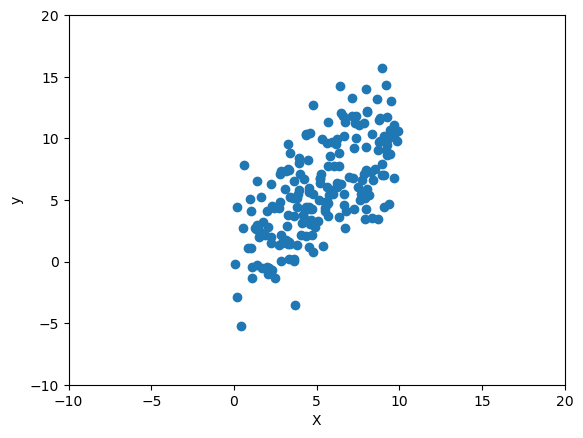

In [2]:
# Generate random data
X = np.random.rand(200, 1) * 10
y = X + 3 * np.random.randn(200, 1)

# Plot the data
plt.scatter(X, y)
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.xlabel('X')
plt.ylabel('y')


In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert numpy arrays to torch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
  

In [4]:
# Creating class for Linear Regression 
class LinearRegression(nn.Module):
  def __init__(self): # Generally, def __init__(self ,input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(1, 1) # Generally, nn.Linear(input_dim, output_dim)  
    
  def forward(self, x):
    return self.linear(x)


In [5]:
# Specify number of interations and learning rate
n_iters = 50
learning_rate = 0.01

# Instantiate model and define loss function and optimizer
model = LinearRegression() # Generally, model = LinearRegression(input_dim, output_dim) 
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [6]:
# Train model by looping
for epoch in range(n_iters):
    
    # Make predictions and calculate loss
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        [w, b] = model.parameters() # unpack parameters
        print(f'epoch {epoch+1} : w = {w[0][0].item():}, loss = {loss:}')

epoch 1 : w = 0.7780545353889465, loss = 28.943944931030273
epoch 6 : w = 1.0198783874511719, loss = 7.850665092468262
epoch 11 : w = 1.0199077129364014, loss = 7.850031852722168
epoch 16 : w = 1.0192142724990845, loss = 7.849614143371582
epoch 21 : w = 1.0185328722000122, loss = 7.849212646484375
epoch 26 : w = 1.017865538597107, loss = 7.8488264083862305
epoch 31 : w = 1.0172117948532104, loss = 7.848457336425781
epoch 36 : w = 1.0165715217590332, loss = 7.8481035232543945
epoch 41 : w = 1.015944480895996, loss = 7.847762107849121
epoch 46 : w = 1.015330195426941, loss = 7.84743595123291


In [7]:
# Evaluate model on test data
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

y_pred = model(X_test_tensor)
test_loss = loss_fn(y_pred, y_test_tensor)
test_loss

tensor(11.4400, grad_fn=<MseLossBackward0>)

Text(0, 0.5, 'y')

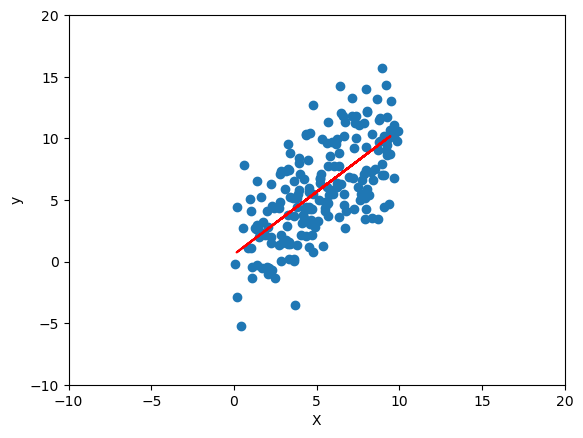

In [8]:
# Plot the data and the model's predictions
plt.scatter(X, y)
plt.plot(X_test, y_pred.detach().numpy(), 'r')
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.xlabel('X')
plt.ylabel('y')